# Using Twitter to Predict National Flu Outbreaks

In [489]:
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
import string 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TweetTokenizer, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
tqdm.pandas(desc="progress-bar")
from pandas.tools.plotting import lag_plot, autocorrelation_plot
from pandas import concat
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR
from datetime import datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
import statsmodels.api as sm  
import itertools
import warnings
warnings.filterwarnings("ignore")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils
from tqdm import tqdm
from gensim.models.phrases import Phrases, Phraser
from sklearn.externals import joblib

In [490]:
#import annotated data
df = pd.read_csv('annotated_tweets.csv', engine='python')
df = df.drop('Unnamed: 0', axis=1)

# Natural Language Processing

In [491]:
def tokenize(tweet):
    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)
    return tknzr.tokenize(tweet)

def classifiers(x_train, y_train):
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    log = LogisticRegression()
    log.fit(x_train, y_train)
    forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
    forest.fit(x_train, y_train)
    gradboost = GradientBoostingClassifier(random_state = 123, max_depth = 5, learning_rate = 0.01)
    gradboost.fit(x_train, y_train)
    adaboost = AdaBoostClassifier(n_estimators=100)
    adaboost.fit(x_train, y_train)
    svm = SVC(kernel='linear', probability=True)
    svm.fit(x_train, y_train)
    return [nb, log, forest, gradboost, adaboost, svm]

def classifier_performance(vectorizer, train_data, test_data, y_test):
    accuracy_df = []
    x_train = vectorizer.fit_transform(train_data)
    x_test = vectorizer.transform(test_data)
    #instantiate classifier objects
    classifier_list = classifiers(x_train, y_train)
    #display accuracy dataframe
    for classifier in classifier_list:
        preds = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, preds)
        accuracy_df.append(accuracy*100)
    accuracy_df = pd.DataFrame(accuracy_df)
    classifiers_key = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Gradient Boost', 'Adaboost',
                      'Support Vector Machine']
    accuracy_df['Model']=classifiers_key
    accuracy_df.rename(columns={0: 'Accuracy'}, inplace=True)
    fin_accuracy_df = accuracy_df[['Model', 'Accuracy']]
    return fin_accuracy_df

In [531]:
data = df['text']
labels = df['status']
train_data, test_data, y_train, y_test = train_test_split(data, labels)
tfidfvec = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
tfidfvec2 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2))
tfidfvec3 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,3))
countvec = CountVectorizer(stop_words='english', tokenizer=tokenize)
countvec2 = CountVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2))
countvec3 = CountVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,3))

In [752]:
train_data

3178    gessi has the flu with the swine flu am worrie...
1750    will not be getting swine flu vaccine in fact ...
3578    was convinced only had cold as had no fever no...
3693    do not worry ve had it its just flu it aint no...
1697    florida meyer concerned about flu bug gainesvi...
2981    this article discusses the importance of getti...
3960    finally getting over the ninfluenza thank you ...
1943    vote will you be getting vaccinated against sw...
1535    you can prevent the swine flu from affecting y...
656                great now is going to get the bird flu
2187    worried about swine flu french authorities wan...
2171       bird and swine flu the complete survival guide
800     new name for the wildcat is bird flu really go...
3175    where to get flu shot is big worry of season b...
554     getting ready for funeral home visit for dear ...
4122    rt you seem pretty scared of catching swine fl...
2935    swine flu vaccine is finally here are you gett...
1949          

In [533]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

## Count Vectorization

**Unigram**

In [532]:
count_ug = classifier_performance(countvec, train_data, test_data, y_test)
count_ug.rename(columns={'Accuracy':'Count (Unigram)'}, inplace=True)
count_ug

,Model,Count (Unigram)
0,Naive Bayes,73.917051
1,Logistic Regression,72.073733
2,Random Forest,59.723502
3,Gradient Boost,67.004608
4,Adaboost,69.308756
5,Support Vector Machine,69.585253


In [534]:
count_ug.to_csv('count_ug.csv')

**Bigram**

In [535]:
count_bg = classifier_performance(countvec2, train_data, test_data, y_test)
count_bg.rename(columns={'Accuracy':'Count (Bigram)'}, inplace=True)
count_bg

,Model,Count (Bigram)
0,Naive Bayes,73.548387
1,Logistic Regression,74.193548
2,Random Forest,59.815668
3,Gradient Boost,67.834101
4,Adaboost,71.152074
5,Support Vector Machine,71.612903


In [536]:
count_bg.to_csv('count_bg.csv')

**Trigram**

In [537]:
count_tg = classifier_performance(countvec3, train_data, test_data, y_test)
count_tg.rename(columns={'Accuracy':'Count (Trigram)'}, inplace=True)
count_tg

,Model,Count (Trigram)
0,Naive Bayes,73.548387
1,Logistic Regression,74.654378
2,Random Forest,60.460829
3,Gradient Boost,68.110599
4,Adaboost,71.244240
5,Support Vector Machine,72.718894


In [538]:
count_tg.to_csv('count_tg.csv')

In [539]:
count_bg.drop(['Model'], axis=1, inplace=True)
count_tg.drop(['Model'], axis=1, inplace=True)
count_all = pd.concat([count_ug, count_bg, count_tg], axis=1)
count_all.head()

,Model,Count (Unigram),Count (Bigram),Count (Trigram)
0,Naive Bayes,73.917051,73.548387,73.548387
1,Logistic Regression,72.073733,74.193548,74.654378
2,Random Forest,59.723502,59.815668,60.460829
3,Gradient Boost,67.004608,67.834101,68.110599
4,Adaboost,69.308756,71.152074,71.244240


In [540]:
count_all.to_csv('count_metrics.csv')

## TF-IDF Vectorization

**Unigram**

In [541]:
tfidf_ug = classifier_performance(tfidfvec, train_data, test_data, y_test)
tfidf_ug.rename(columns={'Accuracy':'TF-IDF (Unigram)'}, inplace=True)
tfidf_ug

,Model,TF-IDF (Unigram)
0,Naive Bayes,73.364055
1,Logistic Regression,73.087558
2,Random Forest,61.105991
3,Gradient Boost,65.990783
4,Adaboost,71.981567
5,Support Vector Machine,71.244240


In [542]:
tfidf_ug.to_csv('tfidf_ug.csv')

**Bigram**

In [543]:
tfidf_bg = classifier_performance(tfidfvec2, train_data, test_data, y_test)
tfidf_bg.rename(columns={'Accuracy':'TF-IDF (Bigram)'}, inplace=True)
tfidf_bg

,Model,TF-IDF (Bigram)
0,Naive Bayes,73.179724
1,Logistic Regression,74.377880
2,Random Forest,60.000000
3,Gradient Boost,66.635945
4,Adaboost,72.534562
5,Support Vector Machine,73.271889


In [544]:
tfidf_bg.to_csv('tfidf_bg.csv')

**Trigram**

In [545]:
tfidf_tg = classifier_performance(tfidfvec3, train_data, test_data, y_test)
tfidf_tg.rename(columns={'Accuracy':'TF-IDF (Trigram)'}, inplace=True)
tfidf_tg

,Model,TF-IDF (Trigram)
0,Naive Bayes,72.718894
1,Logistic Regression,74.654378
2,Random Forest,60.276498
3,Gradient Boost,66.451613
4,Adaboost,71.152074
5,Support Vector Machine,74.285714


In [546]:
tfidf_tg.to_csv('tfidf_tg.csv')

In [547]:
tfidf_bg.drop(['Model'], axis=1, inplace=True)
tfidf_tg.drop(['Model'], axis=1, inplace=True)
tfidf_all = pd.concat([tfidf_ug, tfidf_bg, tfidf_tg], axis=1)
tfidf_all.head()

,Model,TF-IDF (Unigram),TF-IDF (Bigram),TF-IDF (Trigram)
0,Naive Bayes,73.364055,73.179724,72.718894
1,Logistic Regression,73.087558,74.377880,74.654378
2,Random Forest,61.105991,60.000000,60.276498
3,Gradient Boost,65.990783,66.635945,66.451613
4,Adaboost,71.981567,72.534562,71.152074


In [548]:
tfidf_all.to_csv('tfidf_metrics.csv')

## Doc2Vec

“every paragraph is mapped to a unique vector, represented by a column in matrix D and every word is also mapped to a unique vector, represented by a column in matrix W. The paragraph vector and word vectors are averaged or concatenated to predict the next word in a context…The paragraph token can be thought of as another word. It acts as a memory that remembers what is missing from the current context — or the topic of the paragraph.”

In [549]:
#the doc2vec training is completely unsupervised and thus there is no need to hold out any data, as it is unlabelled. 
#labelise each tweet with unique IDs using Gensim’s LabeledSentence function.
def labelize_tweets(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result
  
all_x = df['text']
all_x_w2v = labelize_tweets(all_x, 'all')

### DBOW (Distributed Bag Of Words)

This is the Doc2Vec model analogous to Skip-gram model in Word2Vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

In [753]:
cores = multiprocessing.cpu_count()

model_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_x_w2v)])
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
    
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs

train_vecs_dbow = get_vectors(model_dbow, train_data, 100)
validation_vecs_dbow = get_vectors(model_dbow, test_data, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dbow, y_train)
score = (clf.score(validation_vecs_dbow, y_test))*100
score

100%|██████████| 4337/4337 [00:00<00:00, 1356198.94it/s]


74.47004608294931

In [579]:
doc2vec_df = []
doc2vec_df.append({'DBOW (Unigram)': score})

In [554]:
model_dbow.save('doc2vec_dbow.doc2vec')
model_dbow = Doc2Vec.load('doc2vec_dbow.doc2vec')
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMC (Distributed Memory Concatenation)

This is the Doc2Vec model analogous to CBOW model in Word2vec. The paragraph vectors are obtained by training a neural network on the task of inferring a center word based on context words and a context paragraph.

Note: dm defines the training algorithm. If dm=1 means ‘distributed memory’ (PV-DM) and dm=0 means ‘distributed bag of words’ (PV-DBOW). Distributed Memory model preserves the word order in a document whereas Distributed Bag of words just uses the bag of words approach, which doesn’t preserve any word order.

In [570]:
model_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_dmc.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_dmc.alpha -= 0.002
    model_dmc.min_alpha = model_dmc.alpha
   
train_vecs_dmc = get_vectors(model_dmc, train_data, 100)
validation_vecs_dmc = get_vectors(model_dmc, test_data, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmc, y_train)
score = (clf.score(validation_vecs_dmc, y_test))*100
score

100%|██████████| 4337/4337 [00:00<00:00, 1814714.33it/s]


61.6589861751152

In [580]:
doc2vec_df.append({'DMC (Unigram)': score})

In [572]:
model_dmc.most_similar('flu')

[('swine', 0.6332180500030518),
 ('variety', 0.5514925122261047),
 ('belfast', 0.5468177795410156),
 ('apoint', 0.5339354276657104),
 ('annual', 0.5322495698928833),
 ('punday', 0.5212576389312744),
 ('soy', 0.5191594958305359),
 ('chickenpox', 0.5144401788711548),
 ('reg', 0.5128771066665649),
 ('aids', 0.5127065777778625)]

In [573]:
model_dmc.save('doc2vec_dmc.doc2vec')
model_dmc = Doc2Vec.load('doc2vec_dmc.doc2vec')
model_dmc.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMM (Distributed Memory Mean)

In [574]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha
    
train_vecs_dmm = get_vectors(model_dmm, train_data, 100)
validation_vecs_dmm = get_vectors(model_dmm, test_data, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmm, y_train)
clf.score(validation_vecs_dmm, y_test)
score = (clf.score(validation_vecs_dmm, y_test))*100
score

100%|██████████| 4337/4337 [00:00<00:00, 2069240.87it/s]


70.3225806451613

In [581]:
doc2vec_df.append({'DMM (Unigram)': score})

In [576]:
model_dmm.most_similar('flu')

[('it', 0.4120376706123352),
 ('the', 0.4093024730682373),
 ('not', 0.3983796238899231),
 ('year', 0.39510273933410645),
 ('dont', 0.3726779818534851),
 ('vaccine', 0.3666604161262512),
 ('you', 0.3615446388721466),
 ('do', 0.3464058041572571),
 ('pneumonia', 0.33700132369995117),
 ('bout', 0.33294594287872314)]

In [577]:
model_dmm.save('doc2vec_dmm.doc2vec')
model_dmm = Doc2Vec.load('doc2vec_dmm.doc2vec')
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [582]:
doc2vec_df

[{'DBOW (Unigram)': 73.82488479262673},
 {'DMC (Unigram)': 61.6589861751152},
 {'DMM (Unigram)': 70.3225806451613}]

### Combined Model

With document vectors from four different models, can concatenate them in combination to see how it affects the performance.

In [585]:
#function to concatenate document vectors from different models.
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

In [586]:
train_vecs_dbow_dmc = get_concat_vectors(model_dbow,model_dmc, train_data, 200)
validation_vecs_dbow_dmc = get_concat_vectors(model_dbow,model_dmc, test_data, 200)

In [594]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc, y_train)
score = (clf.score(validation_vecs_dbow_dmc, y_test))*100
score

74.47004608294931

In [595]:
doc2vec_df.append({'DBOW-DMC (Unigram)': score})

In [596]:
doc2vec_df

[{'DBOW (Unigram)': 73.82488479262673},
 {'DMC (Unigram)': 61.6589861751152},
 {'DMM (Unigram)': 70.3225806451613},
 {'DBOW-DMC (Unigram)': 74.47004608294931}]

In [597]:
train_vecs_dbow_dmm = get_concat_vectors(model_dbow,model_dmm, train_data, 200)
validation_vecs_dbow_dmm = get_concat_vectors(model_dbow,model_dmm, test_data, 200)

In [598]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm, y_train)
score = (clf.score(validation_vecs_dbow_dmm, y_test))*100
score

73.6405529953917

In [599]:
doc2vec_df.append({'DBOW-DMM (Unigram)': score})

In [ ]:
model_dbow_dmm.save('doc2vec_dbow_dmm.doc2vec')
model_dbow_dmm = Doc2Vec.load('doc2vec_dbow_dmm.doc2vec')
model_dbow_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

## Phrase Modeling +  Doc2Vec

Try to improve performance of Doc2Vec vectors
Phrase modeling - detects frequently used phrases and stick them together

In [600]:
#bigram model to detect frequently used phrases of 2 works and stick them together
tokenized_train = [t.split() for t in train_data]
phrases = Phrases(tokenized_train)
bigram = Phraser(phrases)

In [601]:
def labelize_tweets_bg(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(bigram[t.split()], [prefix + '_%s' % i]))
    return result
  
all_x = df['text']
all_x_w2v_bg = labelize_tweets_bg(all_x, 'all')

### DBOW (Distributed Bag Of Words) bigram

In [602]:
model_bg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dbow.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dbow.alpha -= 0.002
    model_bg_dbow.min_alpha = model_bg_dbow.alpha
    
train_vecs_dbow_bg = get_vectors(model_bg_dbow, train_data, 100)
validation_vecs_dbow_bg = get_vectors(model_bg_dbow, test_data, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_bg, y_train)
score = (clf.score(validation_vecs_dbow_bg, y_test))*100
score

100%|██████████| 4337/4337 [00:00<00:00, 2002278.09it/s]


73.91705069124424

In [603]:
doc2vec_df.append({'DBOW (Bigram)': score})

In [604]:
model_bg_dbow.save('doc2vec_bg_dbow.doc2vec')
model_bg_dbow = Doc2Vec.load('doc2vec_bg_dbow.doc2vec')
model_bg_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [605]:
doc2vec_df

[{'DBOW (Unigram)': 73.82488479262673},
 {'DMC (Unigram)': 61.6589861751152},
 {'DMM (Unigram)': 70.3225806451613},
 {'DBOW-DMC (Unigram)': 74.47004608294931},
 {'DBOW-DMM (Unigram)': 73.6405529953917},
 {'DBOW (Bigram)': 73.91705069124424}]

### DMC (Distributed Memory Concatenated) bigram

In [606]:
model_bg_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmc.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmc.alpha -= 0.002
    model_bg_dmc.min_alpha = model_bg_dmc.alpha
    
train_vecs_dmc_bg = get_vectors(model_bg_dmc, train_data, 100)
validation_vecs_dmc_bg = get_vectors(model_bg_dmc, test_data, 100)
clf = LogisticRegression()
clf.fit(train_vecs_dmc_bg, y_train)
score = (clf.score(validation_vecs_dmc_bg, y_test))*100
score

100%|██████████| 4337/4337 [00:00<00:00, 1844150.09it/s]


61.6589861751152

In [607]:
doc2vec_df.append({'DMC (Bigram)': score})

In [608]:
model_bg_dmc.most_similar('flu')

[('swine', 0.6645638942718506),
 ('impending', 0.5472079515457153),
 ('annual', 0.5434021353721619),
 ('variety', 0.5220530033111572),
 ('influenza', 0.5220252275466919),
 ('inland', 0.5188254117965698),
 ('diabetes', 0.49816858768463135),
 ('error', 0.4962928891181946),
 ('lu', 0.4942215383052826),
 ('hybrid', 0.49166619777679443)]

In [609]:
model_bg_dmc.save('doc2vec_bg_dmc.doc2vec')
model_bg_dmc = Doc2Vec.load('doc2vec_bg_dmc.doc2vec')
model_bg_dmc.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMM (Distributed Memory Mean) bigram

In [610]:
model_bg_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmm.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmm.alpha -= 0.002
    model_bg_dmm.min_alpha = model_bg_dmm.alpha
    
train_vecs_dmm_bg = get_vectors(model_bg_dmm, train_data, 100)
validation_vecs_dmm_bg = get_vectors(model_bg_dmm, test_data, 100)
clf = LogisticRegression()
clf.fit(train_vecs_dmm_bg, y_train)
score = (clf.score(validation_vecs_dmm_bg, y_test))*100

100%|██████████| 4337/4337 [00:00<00:00, 2108332.92it/s]


In [611]:
doc2vec_df.append({'DMM (Bigram)': score})

In [612]:
model_bg_dmm.save('doc2vec_bg_dmm.doc2vec')
model_bg_dmm = Doc2Vec.load('doc2vec_bg_dmm.doc2vec')
model_bg_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [613]:
doc2vec_df

[{'DBOW (Unigram)': 73.82488479262673},
 {'DMC (Unigram)': 61.6589861751152},
 {'DMM (Unigram)': 70.3225806451613},
 {'DBOW-DMC (Unigram)': 74.47004608294931},
 {'DBOW-DMM (Unigram)': 73.6405529953917},
 {'DBOW (Bigram)': 73.91705069124424},
 {'DMC (Bigram)': 61.6589861751152},
 {'DMM (Bigram)': 70.69124423963133}]

### Combined Memory Bigram

In [621]:
train_vecs_dbow_dmc_bg = get_concat_vectors(model_bg_dbow,model_bg_dmc, train_data, 200)
validation_vecs_dbow_dmc_bg = get_concat_vectors(model_bg_dbow,model_bg_dmc, test_data, 200)
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc_bg, y_train)
score = (clf.score(validation_vecs_dbow_dmc_bg, y_test))*100

In [622]:
doc2vec_df.append({'DBOW-DMC (Bigram)': score})

In [623]:
train_vecs_dbow_dmm_bg = get_concat_vectors(model_bg_dbow,model_bg_dmm, train_data, 200)
validation_vecs_dbow_dmm_bg = get_concat_vectors(model_bg_dbow,model_bg_dmm, test_data, 200)
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm_bg, y_train)
score = (clf.score(validation_vecs_dbow_dmm_bg, y_test))*100

In [624]:
doc2vec_df.append({'DBOW-DMM (Bigram)': score})

In [625]:
doc2vec_df

[{'DBOW (Unigram)': 73.82488479262673},
 {'DMC (Unigram)': 61.6589861751152},
 {'DMM (Unigram)': 70.3225806451613},
 {'DBOW-DMC (Unigram)': 74.47004608294931},
 {'DBOW-DMM (Unigram)': 73.6405529953917},
 {'DBOW (Bigram)': 73.91705069124424},
 {'DMC (Bigram)': 61.6589861751152},
 {'DMM (Bigram)': 70.69124423963133},
 {'DBOW-DMC (Bigram)': 73.27188940092167},
 {'DBOW-DMM (Bigram)': 71.9815668202765}]

### Trigram

In [626]:
tg_phrases = Phrases(bigram[tokenized_train])
trigram = Phraser(tg_phrases)

In [627]:
def labelize_tweets_tg(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(trigram[bigram[t.split()]], [prefix + '_%s' % i]))
    return result

In [628]:
all_x = df['text']
all_x_w2v_tg = labelize_tweets_tg(all_x, 'all')

### DBOW Trigram

In [629]:
model_tg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dbow.build_vocab([x for x in tqdm(all_x_w2v_tg)])

for epoch in range(30):
    model_tg_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dbow.alpha -= 0.002
    model_tg_dbow.min_alpha = model_tg_dbow.alpha
    
train_vecs_dbow_tg = get_vectors(model_tg_dbow, train_data, 100)
validation_vecs_dbow_tg = get_vectors(model_tg_dbow, test_data, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_tg, y_train)
score = (clf.score(validation_vecs_dbow_tg, y_test))*100

100%|██████████| 4337/4337 [00:00<00:00, 1966561.78it/s]


In [630]:
doc2vec_df.append({'DBOW (Trigram)': score})

In [632]:
model_tg_dbow.save('d2v_model_tg_dbow.doc2vec')
model_tg_dbow = Doc2Vec.load('d2v_model_tg_dbow.doc2vec')
model_tg_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMC Trigram

In [633]:
model_tg_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dmc.build_vocab([x for x in tqdm(all_x_w2v_tg)])

for epoch in range(30):
    model_tg_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dmc.alpha -= 0.002
    model_tg_dmc.min_alpha = model_tg_dmc.alpha
    
train_vecs_dmc_tg = get_vectors(model_tg_dmc, train_data, 100)
validation_vecs_dmc_tg = get_vectors(model_tg_dmc, test_data, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmc_tg, y_train)
score = (clf.score(validation_vecs_dmc_tg, y_test))*100

100%|██████████| 4337/4337 [00:00<00:00, 1547222.63it/s]


In [634]:
doc2vec_df.append({'DMC (Trigram)': score})

In [636]:
model_tg_dmc.save('d2v_model_tg_dmc.doc2vec')
model_tg_dmc = Doc2Vec.load('d2v_model_tg_dmc.doc2vec')
model_tg_dmc.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMM Trigram

In [637]:
model_tg_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dmm.build_vocab([x for x in tqdm(all_x_w2v_tg)])

for epoch in range(30):
    model_tg_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dmm.alpha -= 0.002
    model_tg_dmc.min_alpha = model_tg_dmc.alpha

train_vecs_dmm_tg = get_vectors(model_tg_dmm, train_data, 100)
validation_vecs_dmm_tg = get_vectors(model_tg_dmm, test_data, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmm_tg, y_train)
score = (clf.score(validation_vecs_dmm_tg, y_test))*100

100%|██████████| 4337/4337 [00:00<00:00, 2226523.43it/s]


In [638]:
doc2vec_df.append({'DMM (Trigram)': score})

In [640]:
model_tg_dmm.save('d2v_model_tg_dmm.doc2vec')
model_tg_dmm = Doc2Vec.load('d2v_model_tg_dmm.doc2vec')
model_tg_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### Combined Models Trigram

In [648]:
train_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, train_data, 200)
validation_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, test_data, 200)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc_tg, y_train)
clf.score(validation_vecs_dbow_dmc_tg, y_test)

train_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, train_data, 200)
validation_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, test_data, 200)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc_tg, y_train)
score = (clf.score(validation_vecs_dbow_dmc_tg, y_test))*100

In [649]:
doc2vec_df.append({'DBOW-DMC (Trigram)': score})

In [652]:
train_vecs_dbow_dmm_tg = get_concat_vectors(model_tg_dbow,model_tg_dmm, train_data, 200)
validation_vecs_dbow_dmm_tg = get_concat_vectors(model_tg_dbow,model_tg_dmm, test_data, 200)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm_tg, y_train)
clf.score(validation_vecs_dbow_dmm_tg, y_test)

train_vecs_dbow_dmm_tg = get_concat_vectors(model_tg_dbow,model_tg_dmm, train_data, 200)
validation_vecs_dbow_dmm_tg = get_concat_vectors(model_tg_dbow,model_tg_dmm, test_data, 200)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm_tg, y_train)
score = (clf.score(validation_vecs_dbow_dmm_tg, y_test))*100

In [653]:
doc2vec_df.append({'DBOW-DMM (Trigram)': score})

In [658]:
doc2vec_metrics = {k:v for model in doc2vec_df for k,v in model.items()}

In [659]:
doc2vec_metrics

{'DBOW (Unigram)': 73.82488479262673,
 'DMC (Unigram)': 61.6589861751152,
 'DMM (Unigram)': 70.3225806451613,
 'DBOW-DMC (Unigram)': 74.47004608294931,
 'DBOW-DMM (Unigram)': 73.6405529953917,
 'DBOW (Bigram)': 73.91705069124424,
 'DMC (Bigram)': 61.6589861751152,
 'DMM (Bigram)': 70.69124423963133,
 'DBOW-DMC (Bigram)': 73.27188940092167,
 'DBOW-DMM (Bigram)': 71.9815668202765,
 'DBOW (Trigram)': 73.36405529953916,
 'DMC (Trigram)': 63.2258064516129,
 'DMM (Trigram)': 70.59907834101382,
 'DBOW-DMC (Trigram)': 74.47004608294931,
 'DBOW-DMM (Trigram)': 72.35023041474655}

In [663]:
doc2vec_metrics_df = pd.DataFrame(doc2vec_metrics, index=[0])

In [665]:
doc2vec_metrics_df_t = doc2vec_metrics_df.T

In [667]:
doc2vec_metrics_df_t.columns = ['Validation Accuracy']

In [669]:
doc2vec_metrics_df_t.to_csv('doc2vec_metrics.csv')

In [670]:
doc2vec_metrics_df_t

,Validation Accuracy
DBOW (Unigram),73.824885
DMC (Unigram),61.658986
DMM (Unigram),70.322581
DBOW-DMC (Unigram),74.470046
DBOW-DMM (Unigram),73.640553
DBOW (Bigram),73.917051
DMC (Bigram),61.658986
DMM (Bigram),70.691244
DBOW-DMC (Bigram),73.271889
DBOW-DMM (Bigram),71.981567


# Principal Component Analysis

In [671]:
train_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, train_data, 200)
validation_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, test_data, 200)

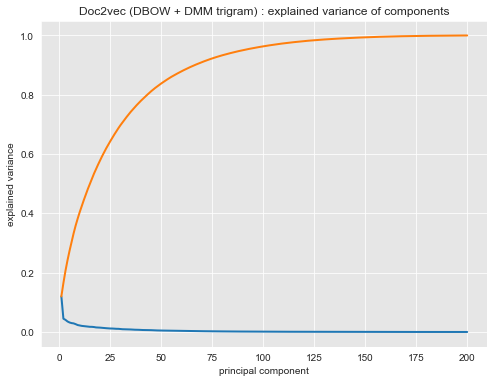

In [674]:
scaler = StandardScaler()
d2v_std = scaler.fit_transform(train_vecs_dbow_dmc_tg)
d2v_std_val = scaler.fit_transform(validation_vecs_dbow_dmc_tg)
d2v_pca = PCA().fit(d2v_std)
fig, ax = plt.subplots(figsize=(8,6))

x_values = range(1, d2v_pca.n_components_+1)

ax.plot(x_values, d2v_pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(d2v_pca.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('Doc2vec (DBOW + DMM trigram) : explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

By looking at the graph above, even though the red line is not perfectly linear, but very close to a straight line. This means each of the principal components contributes to the variance explanation almost equally, and there's not much point in reducing the dimensions based on PCA. This can also be seen from the blue line, which is very close to a straight line in the bottom.

Tf-Idf vectors showed a better result when the features are limited with Tfidf vectorizer in the first place than to reduce dimension afterwards, and doc2vec vectors seem to carry the roughly similar amount of information through its 200 dimension feature space.

# Feature Importance

In [12]:
def top_feature_extraction(vectorizer, num_features):
    unrelated_doc_matrix = vectorizer.transform(df[df.status == 0].text)
    related_doc_matrix = vectorizer.transform(df[df.status == 1].text)
    unrelated_tf = np.sum(unrelated_doc_matrix,axis=0)
    related_tf = np.sum(related_doc_matrix,axis=0)
    unrelated = np.squeeze(np.asarray(unrelated_tf))
    related = np.squeeze(np.asarray(related_tf))
    term_freq_df = pd.DataFrame([unrelated,related],columns=vectorizer.get_feature_names()).transpose()
    term_freq_df.columns = ['unrelated', 'related']
    term_freq_df['total'] = term_freq_df['unrelated'] + term_freq_df['related']
    display(term_freq_df.sort_values(by='total', ascending=False).iloc[:num_features])
    return term_freq_df

In [13]:
def plot_most_predictive_features(vectorizer):
    x_train = vectorizer.fit_transform(train_data)
    x_test = vectorizer.transform(test_data)
    chi2score = chi2(x_train, y_train)[0]

    plt.figure(figsize=(15,10))
    wscores = list(zip(vectorizer.get_feature_names(), chi2score))
    wchi2 = sorted(wscores, key=lambda x:x[1])
    topchi2 = list(zip(*wchi2[-20:]))
    x = range(len(topchi2[1]))
    labels = topchi2[0]
    plt.barh(x,topchi2[1], align='center', alpha=0.2)
    plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
    plt.yticks(x, labels)
    plt.xlabel('$\chi^2$')
    plt.title('Most predictive features and associated Chi-square scores')

# Exploratory Data Analysis

## Class Distribution

No handles with labels found to put in legend.


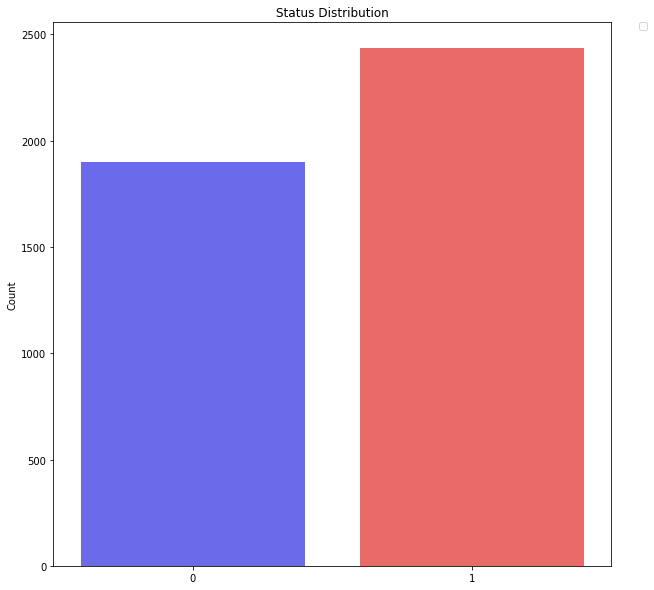

In [14]:
#distribution of annotated dataset (0/1)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(x="status", data=df, palette='seismic')
ax.set_title('Status Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# In-Depth Classifier Performance

In [162]:
def print_metrics(model, x_test, y_test):
    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print("Accuracy Score for model: {:.4}%".format(accuracy * 100))
    print("Precision Score for model: {:.4}%".format(precision * 100))
    print("Recall Score for model: {:.4}%".format(recall * 100))
    print("F1 Score for model: {:.4}%".format(f1 * 100))
    return accuracy, precision, recall, f1
    

def cm_plot(labels, predictions, normalize=False, cmap='Spectral'):
    cm = confusion_matrix(labels, predictions)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, ['POS', 'NEG'], ['POS', 'NEG'])
    sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g', cmap=cmap)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.colorbar()
    plt.show()

def plot_roc_curve(labels, predictions, y_score):
    fpr, tpr, thresholds = roc_curve(labels, y_score)
    print('AUC: {}'.format(auc(fpr, tpr)))
    #Seaborns Beautiful Styling
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [327]:
x_train = tfidfvec2.fit_transform(train_data)
x_test = tfidfvec2.transform(test_data)

## Naive Bayes

Accuracy Score for model: 72.07%
Precision Score for model: 71.24%
Recall Score for model: 85.62%
F1 Score for model: 77.77%


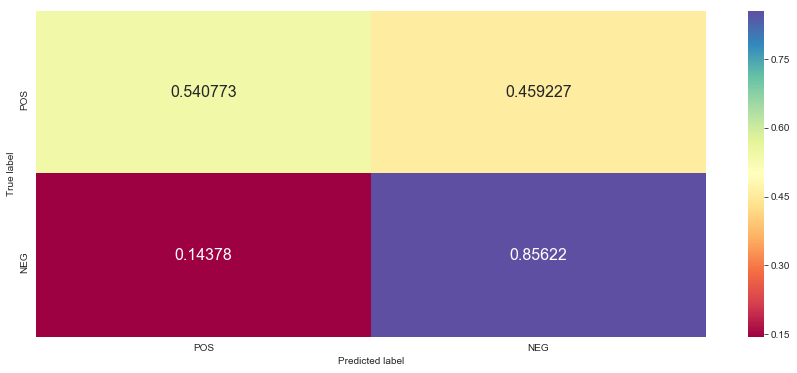

AUC: 0.7951597135071797


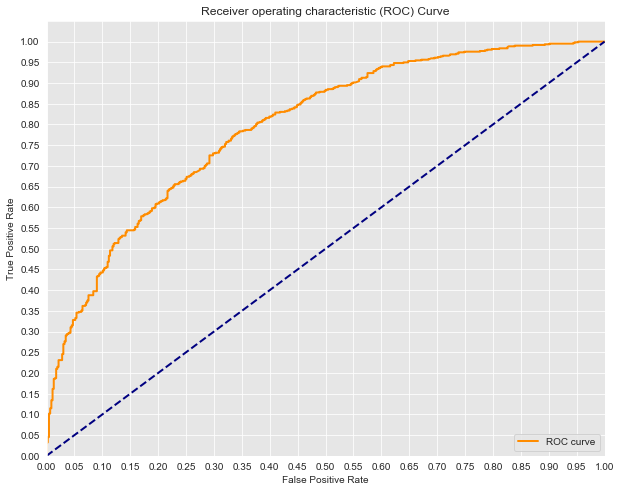

In [328]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
preds = nb.predict(x_test)
y_score = nb.predict_proba(x_test)

print_metrics(nb,x_test,y_test)
cm_plot(y_test,preds, normalize=True, cmap='Spectral')
plot_roc_curve(y_test,preds, y_score[:,1])

In [348]:
joblib.dump(nb,'nb.pkl')

['nb.pkl']

## Logistic Regression

### Hyperparameter Tuning

**L1 vs. L2 Regularization**

AUC for l1: 0.7702200079603628
AUC for l2: 0.7969798657718121


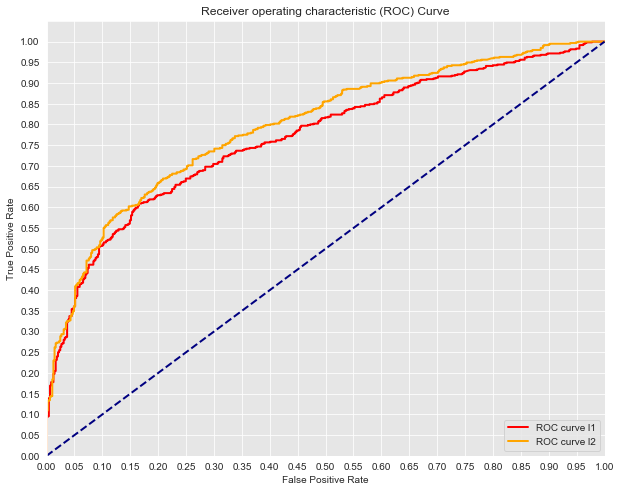

In [18]:
#compare L1 & L2 regularization
penalties = ['l1', 'l2']
colors = ['r', 'orange']

plt.figure(figsize=(10,8))

for n, pen in enumerate(penalties):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, penalty=pen) #Starter code
    model_log = logreg.fit(x_train, y_train)
    #Predict
    y_hat_test = logreg.predict(x_test)
    y_score = logreg.fit(x_train, y_train).decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(str(pen), auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(pen))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Class Weights**

AUC for balanced: 0.7945334266617257
AUC for None: 0.7969798657718121


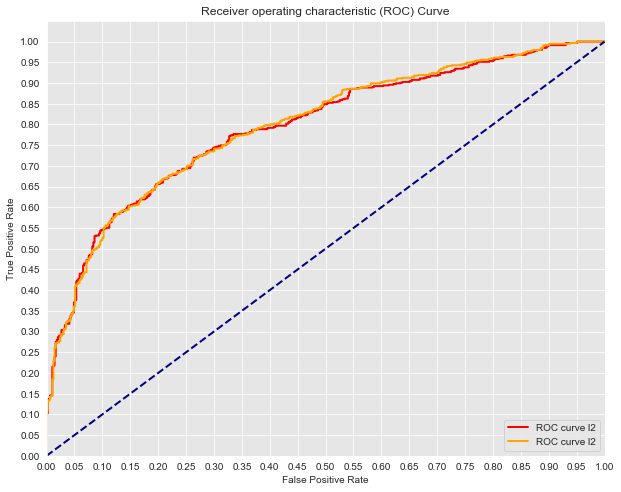

In [19]:
wgts = ['balanced', None]
colors = ['r', 'orange']

plt.figure(figsize=(10,8))

for n, wgt in enumerate(wgts):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, class_weight=wgt) #Starter code
    model_log = logreg.fit(x_train, y_train)
    #Predict
    y_hat_test = logreg.predict(x_test)
    y_score = logreg.fit(x_train, y_train).decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(str(wgt), auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(pen))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy Score for model: 72.07%
Precision Score for model: 74.23%
Recall Score for model: 78.19%
F1 Score for model: 76.16%


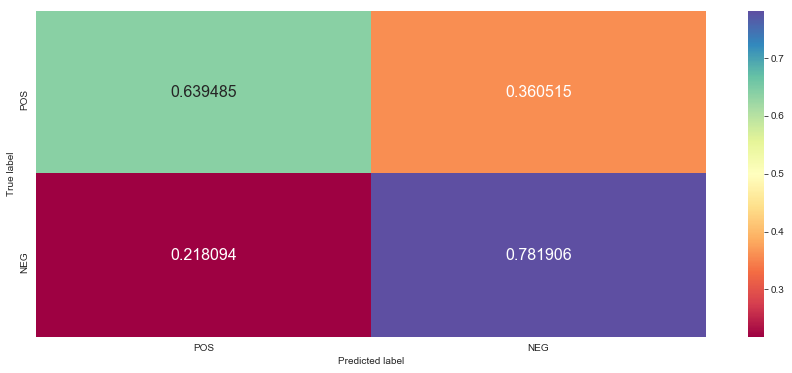

AUC: 0.8001622442399827


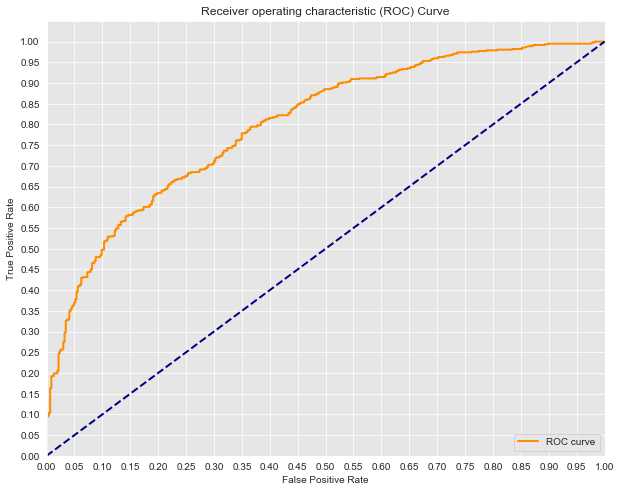

In [360]:
log = LogisticRegression()
log = log.fit(x_train, y_train)
preds = log.predict(x_test)
y_score = log.decision_function(x_test)

print_metrics(log,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score)

In [349]:
joblib.dump(log,'log.pkl')

['log.pkl']

In [334]:
log = joblib.load('log.pkl')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Random Forest

Accuracy Score for model: 57.42%
Precision Score for model: 57.26%
Recall Score for model: 100.0%
F1 Score for model: 72.82%


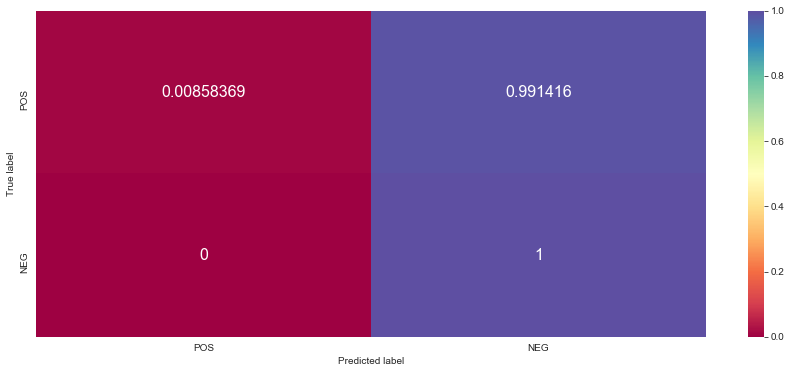

AUC: 0.7387295721328184


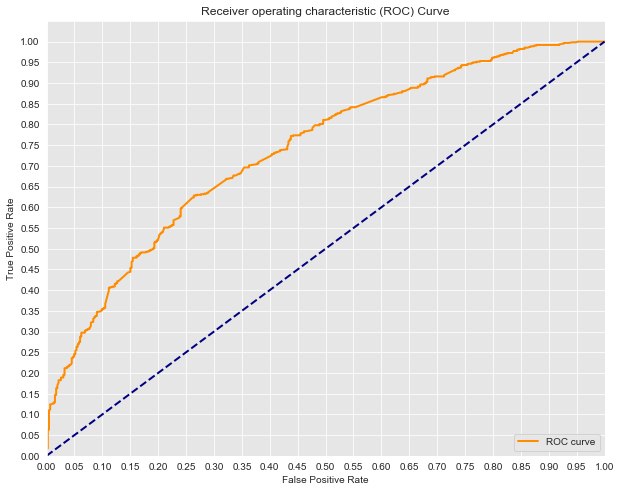

In [338]:
forest = RandomForestClassifier(n_estimators=100, max_depth=3)
forest.fit(x_train, y_train)
preds = forest.predict(x_test)
y_score = forest.predict_proba(x_test)

print_metrics(forest,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

In [350]:
joblib.dump(forest,'forest.pkl')

['forest.pkl']

## Gradient Boost

Accuracy Score for model: 67.65%
Precision Score for model: 66.38%
Recall Score for model: 87.72%
F1 Score for model: 75.57%


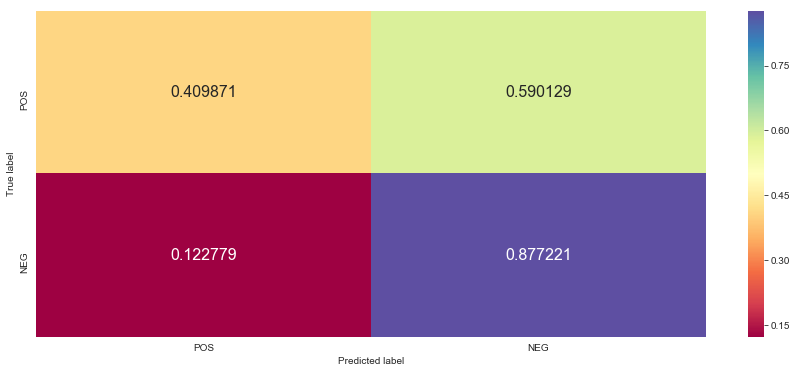

AUC: 0.7523313942604367


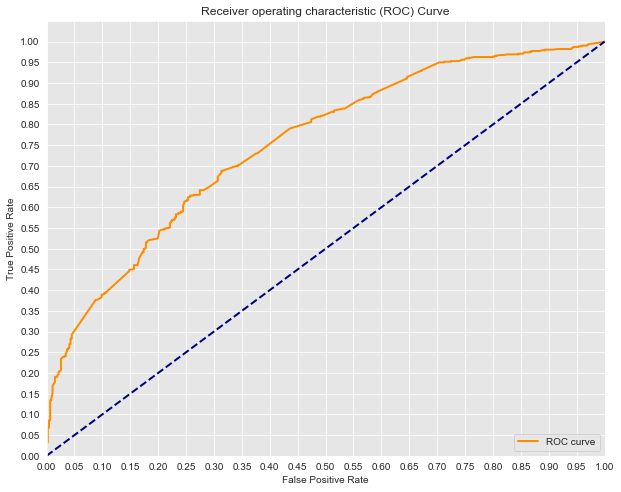

In [340]:
#adjust learning rate
gradboost = GradientBoostingClassifier(random_state = 123, max_depth = 5, learning_rate = 0.01)
gradboost.fit(x_train, y_train)
preds = gradboost.predict(x_test)
y_score = gradboost.predict_proba(x_test)

print_metrics(gradboost,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

In [351]:
joblib.dump(gradboost,'gradboost.pkl')

['gradboost.pkl']

## Adaboost

Accuracy Score for model: 68.85%
Precision Score for model: 72.06%
Recall Score for model: 74.15%
F1 Score for model: 73.09%


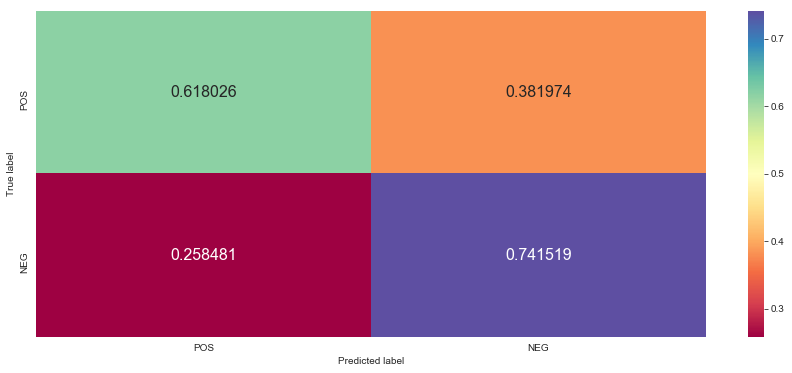

AUC: 0.7500086668931615


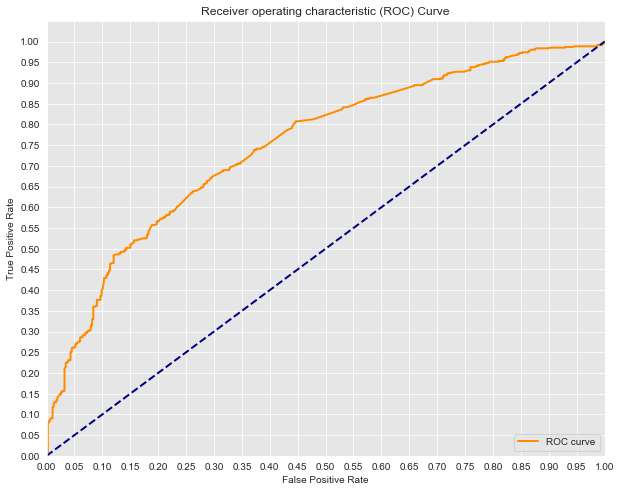

In [342]:
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(x_train, y_train)
preds = adaboost.predict(x_test)
y_score = adaboost.predict_proba(x_test)

print_metrics(adaboost,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

In [352]:
joblib.dump(adaboost,'adaboost.pkl')

['adaboost.pkl']

## Support Vector Machine

Accuracy Score for model: 72.9%
Precision Score for model: 76.34%
Recall Score for model: 76.09%
F1 Score for model: 76.21%


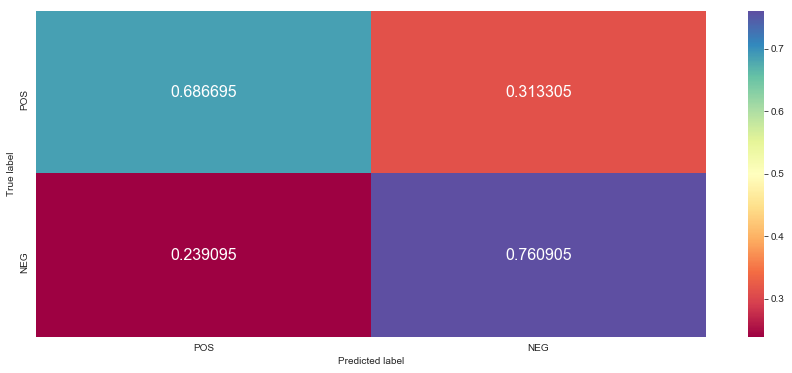

AUC: 0.7916097540682396


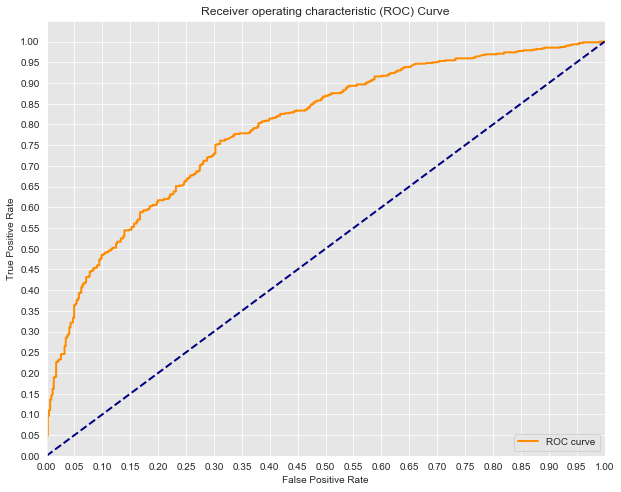

In [344]:
svm = SVC(kernel='linear', probability=True)
svm = svm.fit(x_train, y_train) 
preds = svm.predict(x_test)
y_score = svm.predict_proba(x_test)

print_metrics(svm,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds, y_score[:,1])

In [353]:
joblib.dump(svm,'svm.pkl')

['svm.pkl']

## Classifier Comparison

In [25]:
metrics_df = classifier_performance(tfidfvec2, train_data, test_data, y_test)

In [26]:
#roc curves

# Pickling Models

In [ ]:
joblib.dump(nb, 'nb.pkl')
joblib.dump(logreg, 'log.pkl') 
joblib.dump(forest, 'forest.pkl')
joblib.dump(gradboost, 'gradboost.pkl') 
joblib.dump(adaboost, 'adaboost.pkl') 
joblib.dump(svm, 'svm.pkl') 

# Classifying 2016-2018 Tweets

Use TF-IDF bi-gram vectorization, logistic regression with default settings

In [178]:
data = df['text']
labels = df['status']
train_data, test_data, y_train, y_test = train_test_split(data, labels)
tfidfvec2 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2), max_features=20000)
x_train = tfidfvec2.fit_transform(train_data)
x_test = tfidfvec2.transform(test_data)

log = LogisticRegression()
log = log.fit(x_train, y_train)

In [173]:
twitter_df = pd.read_csv('2016_2018_tweets.csv')
twitter_df = twitter_df.drop('Unnamed: 0', axis=1)

,Tweet ID,DateTime,text
0,1044356219291332608,2018-09-24 18:41,please punish me for you having the flu
1,1044356218435907584,2018-09-24 18:41,that is extra scary when prof michelle barry a...
2,1044356171002515459,2018-09-24 18:41,got my flu shot today
3,1044356114966622208,2018-09-24 18:41,scientists verify elderberry beats the flu pre...
4,1044356046695923717,2018-09-24 18:40,thank you omg sorry you ve got the flu going o...


In [ ]:
twitter_df.head()

In [174]:
twitter_df.dropna(subset=['text'], inplace=True)

In [175]:
len(twitter_df)

3432451

In [179]:
#tfidf-bigram
data = twitter_df['text']
x = tfidfvec2.fit_transform(data)

In [180]:
classified_tweets = log.predict(x)

In [184]:
classified_tweets

array([1, 1, 1, ..., 1, 1, 1])

In [228]:
tweet_date = twitter_df[' DateTime']
tweet_ids = twitter_df['Tweet ID']

In [198]:
len(twitter_df)

3432451

In [229]:
classified_df = []
for i in range(len(twitter_df)):
    try:
        classified_df.append({'id': tweet_ids[i], 'text': data[i], 'status': classified_tweets[i], 'created': tweet_date[i]})
    except:
        continue

In [230]:
classified_tweets_df = pd.DataFrame(classified_df)

In [231]:
flu_tweets_df = classified_tweets_df[classified_tweets_df['status'].map(lambda x: x==1)]

In [256]:
flu_tweets_df.to_csv('flu_tweets.csv')

In [234]:
from langdetect import detect_langs

def english(string):
    res = detect_langs(string)
    for item in res:
        if item.lang == "en":
            return True

In [244]:
flu_tweets_df.head(1000)

,created,id,status,text
0,2018-09-24 18:41,1044356219291332608,1,please punish me for you having the flu
1,2018-09-24 18:41,1044356218435907584,1,that is extra scary when prof michelle barry a...
2,2018-09-24 18:41,1044356171002515459,1,got my flu shot today
4,2018-09-24 18:40,1044356046695923717,1,thank you omg sorry you ve got the flu going o...
6,2018-09-24 18:40,1044356003804831744,1,flu shots are here just got mine the flu is no...
7,2018-09-24 18:40,1044355983332511744,1,facebook soundoff health experts say you shoul...
8,2018-09-24 18:40,1044355936255692800,1,it not the flu it the poor health care and shi...
10,2018-09-24 18:40,1044355823978377216,1,work was balls and pretty sure getting sick wi...
11,2018-09-24 18:40,1044355803635953664,1,day of the flu meant to have my jab next week ...
12,2018-09-24 18:39,1044355739681214464,1,new addition to top hardest drake moments canc...


In [251]:
test = flu_tweets_df[:25]

In [258]:
test

,created,id,status,text
0,2018-09-24 18:41,1044356219291332608,1,please punish me for you having the flu
1,2018-09-24 18:41,1044356218435907584,1,that is extra scary when prof michelle barry a...
2,2018-09-24 18:41,1044356171002515459,1,got my flu shot today
4,2018-09-24 18:40,1044356046695923717,1,thank you omg sorry you ve got the flu going o...
6,2018-09-24 18:40,1044356003804831744,1,flu shots are here just got mine the flu is no...
7,2018-09-24 18:40,1044355983332511744,1,facebook soundoff health experts say you shoul...
8,2018-09-24 18:40,1044355936255692800,1,it not the flu it the poor health care and shi...
10,2018-09-24 18:40,1044355823978377216,1,work was balls and pretty sure getting sick wi...
11,2018-09-24 18:40,1044355803635953664,1,day of the flu meant to have my jab next week ...
12,2018-09-24 18:39,1044355739681214464,1,new addition to top hardest drake moments canc...


In [273]:
eng_flu_tweets['english'] = flu_tweets_df['text'].map(lambda x: english(x))

KeyboardInterrupt: 

In [272]:
subset = flu_tweets_df[:100]
subset.to_csv('test.csv')

In [268]:
len(test_eng)
test_eng

,created,id,status,text,english
0,2018-09-24 18:41,1044356219291332608,1,please punish me for you having the flu,True
1,2018-09-24 18:41,1044356218435907584,1,that is extra scary when prof michelle barry a...,True
2,2018-09-24 18:41,1044356171002515459,1,got my flu shot today,True
4,2018-09-24 18:40,1044356046695923717,1,thank you omg sorry you ve got the flu going o...,True
6,2018-09-24 18:40,1044356003804831744,1,flu shots are here just got mine the flu is no...,True


In [ ]:
#save as a csv

# Time Series Analysis

## Data Preparation

### CDC Data

In [675]:
def clean_df(df):
    df.reset_index(inplace=True) # Resets the index, makes factor a column
    df.drop('PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS',axis=1,inplace=True) # drop factor from axis 1 and make changes permanent by inplace=True
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df["Date"] = pd.to_datetime(df.WEEK.astype(str)+
                              df.YEAR.astype(str).add('-1') ,format='%W%Y-%w')
    df.set_index(df['Date'], inplace=True)
    df['ILITOTAL'] = df['ILITOTAL'].astype('int64')
    return df

In [680]:
cdc_16 = pd.read_csv('FluViewPhase2Data/16_17.csv')
cdc_17 = pd.read_csv('FluViewPhase2Data/17_18.csv')

cdc_16 = clean_df(cdc_16)
cdc_16 = cdc_16.drop(['AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
               'AGE 50-64', 'AGE 65', 'NUM. OF PROVIDERS', 'Date', 'YEAR','WEEK',  
              '%UNWEIGHTED ILI', 'TOTAL PATIENTS'], axis=1)
cdc_17 = clean_df(cdc_17)
cdc_17 = cdc_17.drop(['REGION TYPE', 'REGION', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
               'AGE 50-64', 'AGE 65', 'NUM. OF PROVIDERS', 'Date', 'YEAR','WEEK', '% WEIGHTED ILI', 
              '%UNWEIGHTED ILI'], axis=1)
cdc_df = pd.concat([cdc_16, cdc_17])
cdc_df.head()

,ILITOTAL
Date,
2016-10-03,10920
2016-10-10,10997
2016-10-17,11926
2016-10-24,12648
2016-10-31,13790


In [683]:
test.index

Index(['2016-10-03', '2016-10-10', '2016-10-17', '2016-10-24', '2016-10-31',
       '2016-11-07', '2016-11-14', '2016-11-21', '2016-11-28', '2016-12-05',
       ...
       '2018-07-09', '2018-07-16', '2018-07-23', '2018-07-30', '2018-08-06',
       '2018-08-13', '2018-08-20', '2018-08-27', '2018-09-03', '2018-09-10'],
      dtype='object', name='Date', length=102)

### Twitter Data

In [462]:
twitter_df = pd.read_csv('Parsed_tweets_2.csv', header=None)
twitter_df.drop([0], axis=1, inplace=True)
twitter_df.columns = ['original_date', 'tweet_id', 'status', 'text', 'week/year']
twitter_df_new = pd.DataFrame(twitter_df['week/year'].str.split('/',1).tolist(),
                                   columns = ['week','year'])
twitter_df = twitter_df.join(twitter_df_new, how='outer')
twitter_df["date"] = pd.to_datetime(twitter_df['week'].astype(str)+
                                           twitter_df['year'].astype(str).add('-1') ,format='%W%Y-%w')
twitter_df = twitter_df.groupby(['date']).size().reset_index(name='count')
twitter_df.set_index(twitter_df['date'], inplace=True)
twitter_df['count'] = twitter_df['count'].astype('int64')
twitter_df = twitter_df.drop(['date'], axis=1)
twitter_df = twitter_df['2016-10-03':'2018-09-10']

In [463]:
twitter_df

,count
date,
2016-10-03,35133
2016-10-10,34220
2016-10-17,33086
2016-10-24,33267
2016-10-31,25675
2016-11-07,24950
2016-11-14,27129
2016-11-21,25441
2016-11-28,27279


### Google Trends Data

In [4]:
google_df = pd.read_csv('google_trends/multiTimeline.csv')
google_df.reset_index(inplace=True) # Resets the index, makes factor a column
google_df.columns = google_df.iloc[0]
google_df = google_df.iloc[1:]
google_df.rename(columns={'Week': 'Date'}, inplace=True)
google_df.rename(columns={'flu: (United States)': 'Count'}, inplace=True)
google_df.set_index(google_df['Date'], inplace=True)
google_df.drop(['Date'], axis=1, inplace=True)
google_df['Count'] = google_df['Count'].astype('int64')

## Data Visualizations

### CDC Data

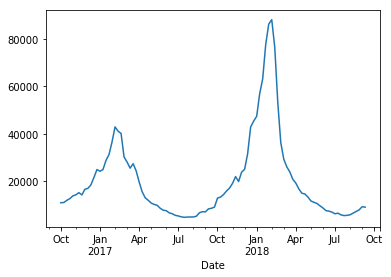

In [5]:
cdc_df.plot()
plt.legend().set_visible(False)
plt.show()

### Twitter Data

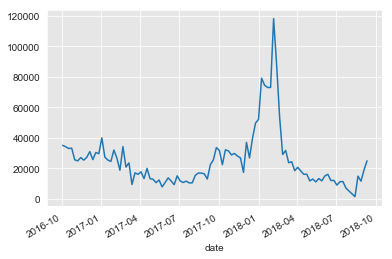

In [414]:
twitter_df.plot()
plt.legend().set_visible(False)
plt.show()

### Google Trends Data

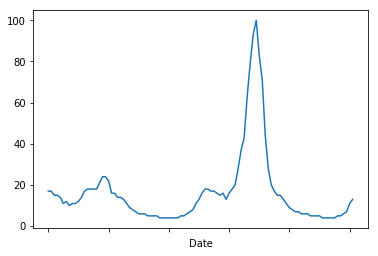

In [6]:
google_df.plot()
plt.legend().set_visible(False)
plt.show()

## Assessing Stationarity

In [7]:
#Plot rolling statistics
def check_stationarity(df,window,count):
    moving_avg = df.rolling(window).mean() #4 week lag
    moving_std = df.rolling(window).std()

    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
    std = plt.plot(moving_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(count, autolag='AIC')

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
#mean and standard deviation increasing with time = not stationary

### Dickey-Fuller Test

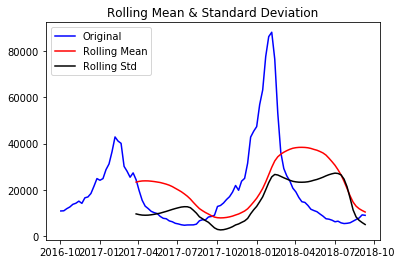

Results of Dickey-Fuller Test:
Test Statistic                 -2.843437
p-value                         0.052332
#Lags Used                      5.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


In [8]:
# Perform the dickey Fuller test 
cdc_df.dropna(inplace=True)
check_stationarity(cdc_df, 26, cdc_df['ILITOTAL'])
#null: time-series is non-stationary 
#p-value: 0.05
#p-value > 0.05, fail to reject null --> time-series is non-stationary at 95% confidence 

### Decomposition Visualization

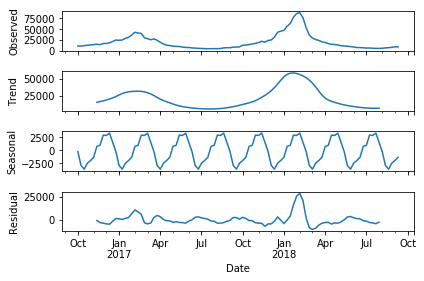

In [9]:
result = seasonal_decompose(cdc_df, freq=12) #every 4 weeks
result.plot()
plt.show()

## Stationarization of Data

### Seasonal Differencing

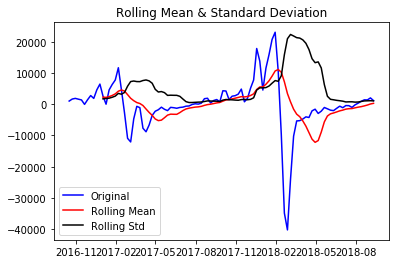

Results of Dickey-Fuller Test:
Test Statistic                 -2.834899
p-value                         0.053459
#Lags Used                      8.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [23]:
cdc_seasonal_diff= cdc_df - cdc_df.shift(12)
cdc_seasonal_diff.dropna(inplace=True)
check_stationarity(cdc_seasonal_diff, 12, cdc_seasonal_diff['ILITOTAL'])
#p-value: 0.002264 -- stationary data 

## ACF & PACF Visualizations

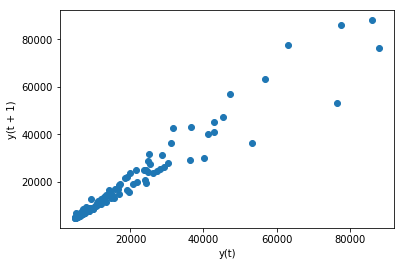

In [11]:
#plot the observation at the previous time step 
#(t-1) with the observation at the next time step (t+1) as a scatter plot.
#plots the visits(t) on the x-axis against 
#the visits on the previous day (t-1) on the y-axis.
lag_plot(cdc_df)
#clear correlation

### Pearson Correlation

In [12]:
# creates a lagged version of the dataset and calculates a 
#correlation matrix of each column with other columns, including itself.
values = cdc_df['ILITOTAL']
dataframe = concat([values.shift(2), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)
#strong positive correlation (0.89) between the observation and the lag=2 value.

          t-1       t+1
t-1  1.000000  0.892759
t+1  0.892759  1.000000


### Autocorrelation Plot

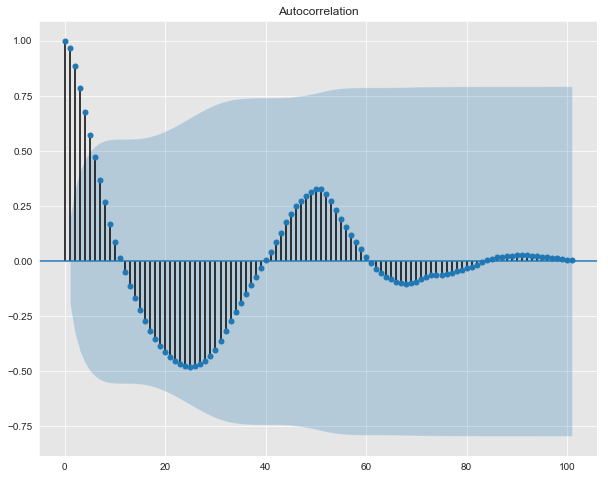

In [701]:
plot_acf(cdc_df)
rcParams['figure.figsize'] = 8, 6
plt.show()

### PACF Chart for Seasonal Differences

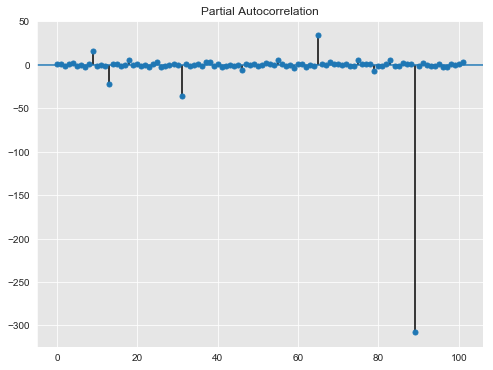

In [702]:
plot_pacf(cdc_df)
rcParams['figure.figsize'] = 8, 6
plt.show()

Use PACF for AR model diagnostics and ACF for MA model diagnostics

# ARIMA Modeling

## Seasonal ARIMA Model, CDC Data Only

### Hyperparameter Selection

In [ ]:
#https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/
#add grid search 
def sarimax_grid_search():
    # Define the p, d and q parameters to take any value between 0 and 2
    p = [0, 1, 2, 4, 6, 8, 10]
    d = range(0, 3)
    q = range(0, 3)
    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(cdc_df['ILITOTAL'],
                                                order=comb,
                                                seasonal_order=combs)
                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    return ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
sarimax_grid_search()

In [61]:
mod = sm.tsa.statespace.SARIMAX(cdc_df['ILITOTAL'], order=(1,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                           ILITOTAL   No. Observations:                  102
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -857.123
Date:                            Sun, 30 Sep 2018   AIC                           1722.245
Time:                                    12:59:20   BIC                           1732.200
Sample:                                10-03-2016   HQIC                          1726.258
                                     - 09-10-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7004      0.068     10.279      0.000       0.567       0.834
ar.S.L12      -0.0068      0.166   

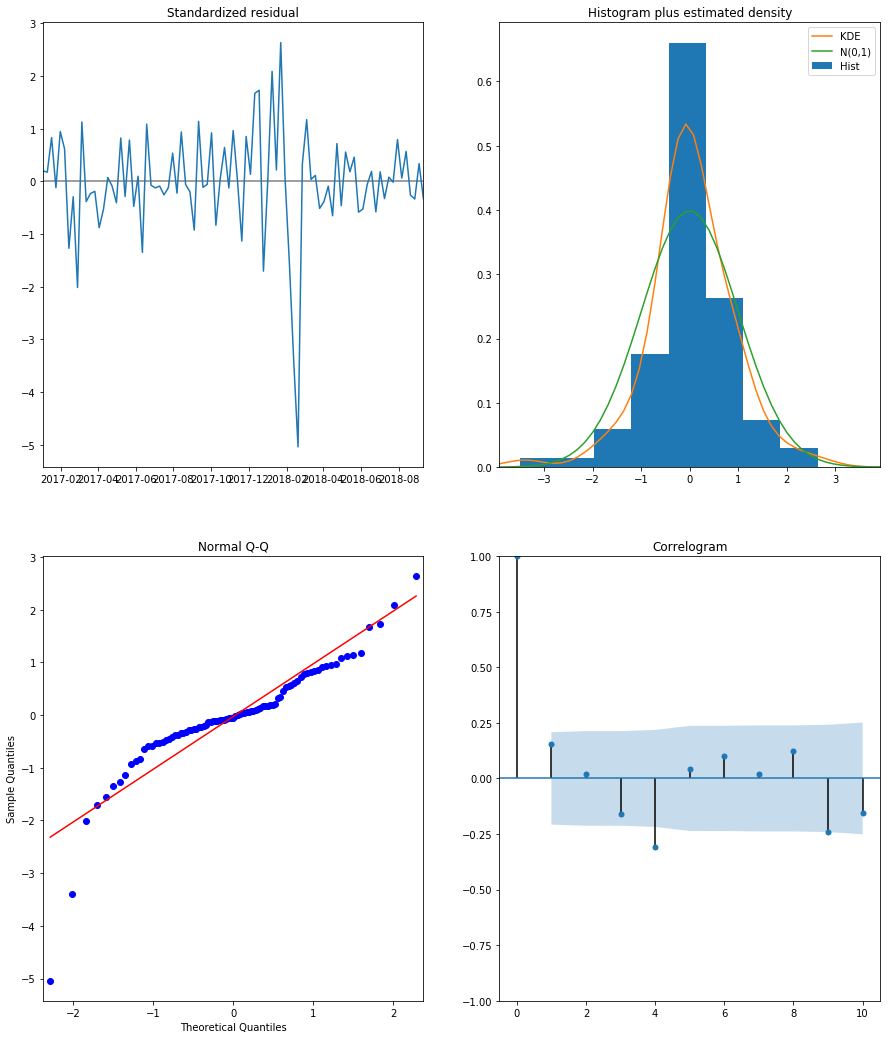

In [62]:
results.plot_diagnostics(figsize=(15, 18))
plt.show()

* KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

## Model Validation

### One-Step Ahead Forecasting
Compare predicted values to real values in the time series

In [63]:
def forecasting(results, dynamic=False):
    # get predictions 
    pred = results.get_prediction(start=pd.to_datetime('2017-01-02'), dynamic=dynamic)
    pred_conf = pred.conf_int()
    # Plot real vs predicted values along with confidence interval
    rcParams['figure.figsize'] = 15, 6

    #Plot observed values
    ax = cdc_df['2016':].plot(label='observed')
    #Plot predicted values
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)
    #Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='g', alpha=.5)
    #Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('ILI-visits')
    plt.legend()
    plt.show()
    # Get the Real and predicted values
    visits_forecasted = pred.predicted_mean
    visits_truth = cdc_df['2017-01-02':]['ILITOTAL']
    # Compute the mean square error
    mse = np.sqrt(((visits_forecasted - visits_truth) ** 2).mean())
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

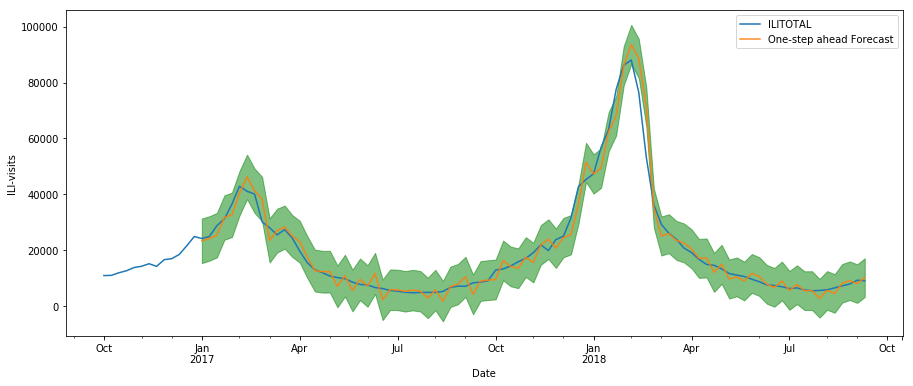

The Root Mean Squared Error of our forecasts is 3651.55


In [64]:
forecasting(results, dynamic=False)

### Dynamic Forecasting
Only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

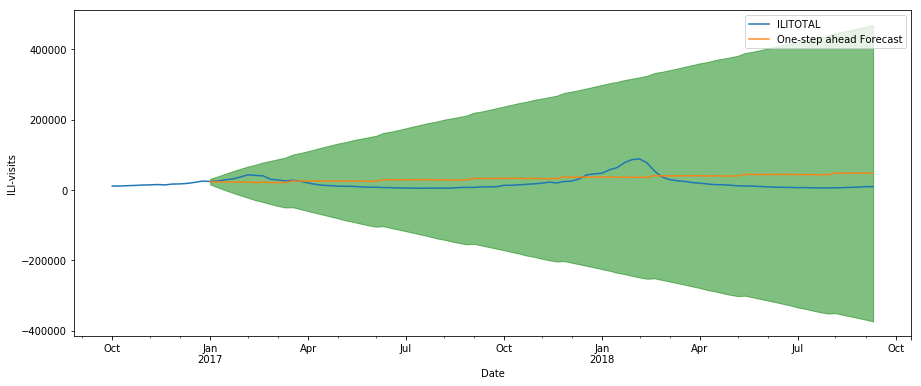

The Root Mean Squared Error of our forecasts is 24821.22


In [65]:
forecasting(results,dynamic=True)

In [66]:
def get_forecast(steps):
    # Get forecast 500 steps ahead in future
    prediction = results.get_forecast(steps=steps)
    # Get confidence intervals of forecasts
    pred_conf = prediction.conf_int()
    # Plot future predictions with confidence intervals
    ax = cdc_df.plot(label='observed', figsize=(20, 15))
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('ILI visits')

    plt.legend()
    plt.show()

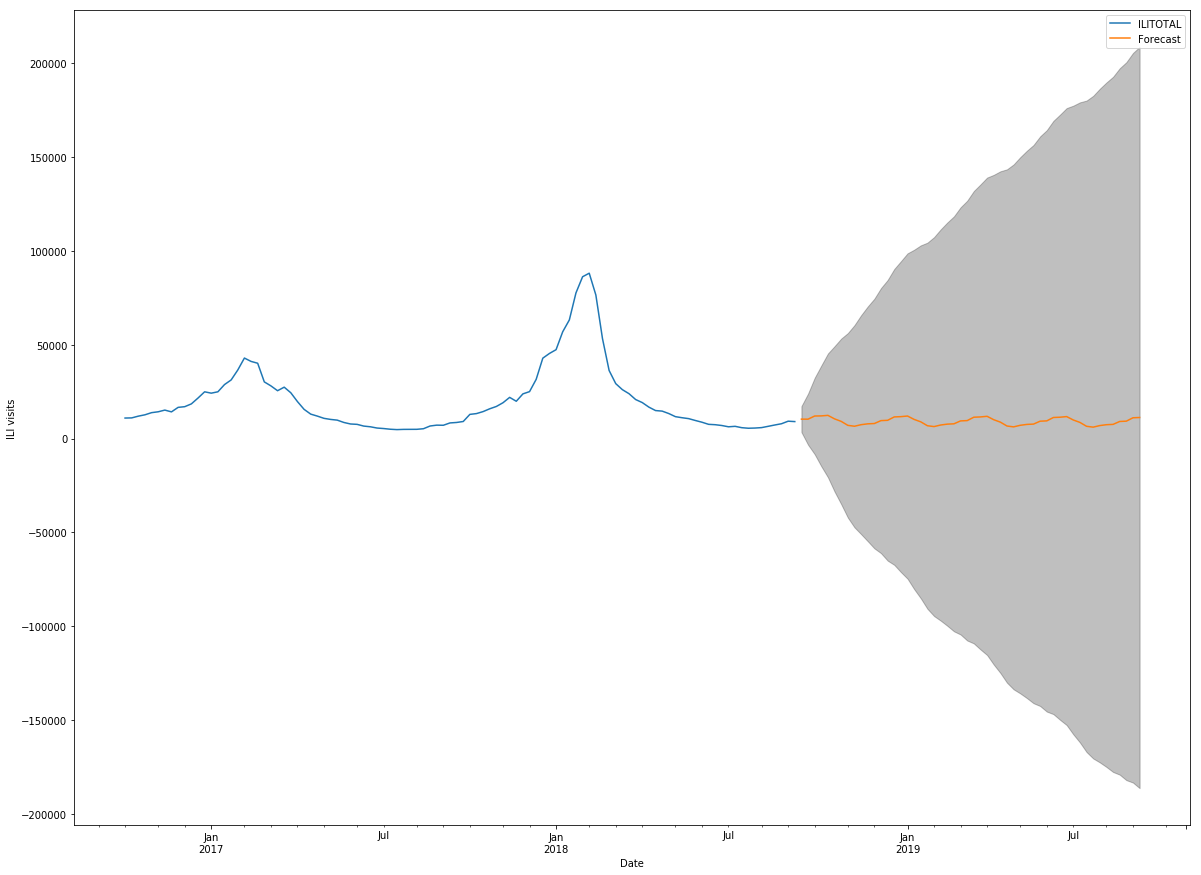

In [68]:
get_forecast(52)

## Seasonal ARIMA Model, CDC & Twitter Data

In [430]:
tweet_counts = twitter_df['count']
tweet_counts

date
2016-10-03     35133
2016-10-10     34220
2016-10-17     33086
2016-10-24     33267
2016-10-31     25675
2016-11-07     24950
2016-11-14     27129
2016-11-21     25441
2016-11-28     27279
2016-12-05     31005
2016-12-12     25783
2016-12-19     30431
2016-12-26     29641
2017-01-02     40041
2017-01-09     27388
2017-01-16     25490
2017-01-23     24609
2017-01-30     32072
2017-02-06     26768
2017-02-13     18805
2017-02-20     34353
2017-02-27     20876
2017-03-06     23652
2017-03-13      9479
2017-03-20     17082
2017-03-27     16157
2017-04-03     17772
2017-04-10     13325
2017-04-17     20035
2017-04-24     13279
               ...  
2018-02-05    118165
2018-02-12     87921
2018-02-19     53512
2018-02-26     29121
2018-03-05     31788
2018-03-12     23752
2018-03-19     24383
2018-03-26     18514
2018-04-02     20761
2018-04-09     18388
2018-04-16     16160
2018-04-23     16205
2018-04-30     11855
2018-05-07     13050
2018-05-14     11180
2018-05-21     13361
2018-05-

In [483]:
fin_cdc_df = cdc_df.join(twitter_df, how='outer')
fin_cdc_df.at['2018-07-30', 'count'] = 7107
fin_cdc_df.at['2018-08-06', 'count'] = 7107

In [484]:
mod = sm.tsa.statespace.SARIMAX(fin_cdc_df['ILITOTAL'], exog=fin_cdc_df['count'], order=(1,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                           ILITOTAL   No. Observations:                  102
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -864.837
Date:                            Tue, 02 Oct 2018   AIC                           1739.673
Time:                                    13:09:02   BIC                           1752.116
Sample:                                10-03-2016   HQIC                          1744.689
                                     - 09-10-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
count          0.0973      0.051      1.927      0.054      -0.002       0.196
ar.L1          0.6878      0.188   

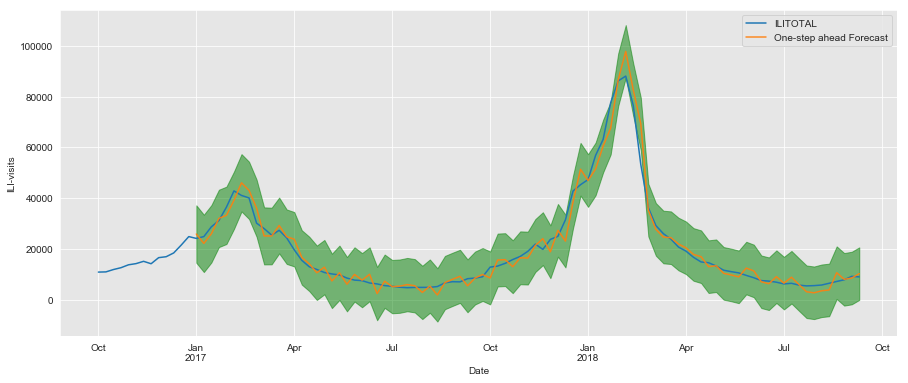

The Root Mean Squared Error of our forecasts is 3448.62


In [485]:
forecasting(results, dynamic=False)

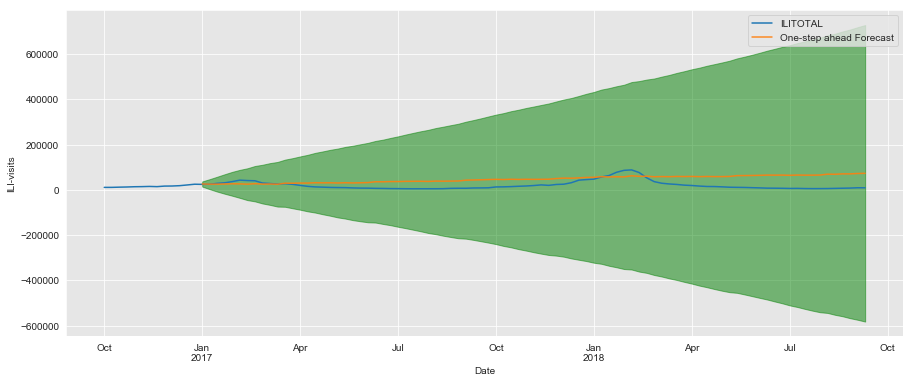

The Root Mean Squared Error of our forecasts is 35628.97


In [486]:
forecasting(results,dynamic=True)

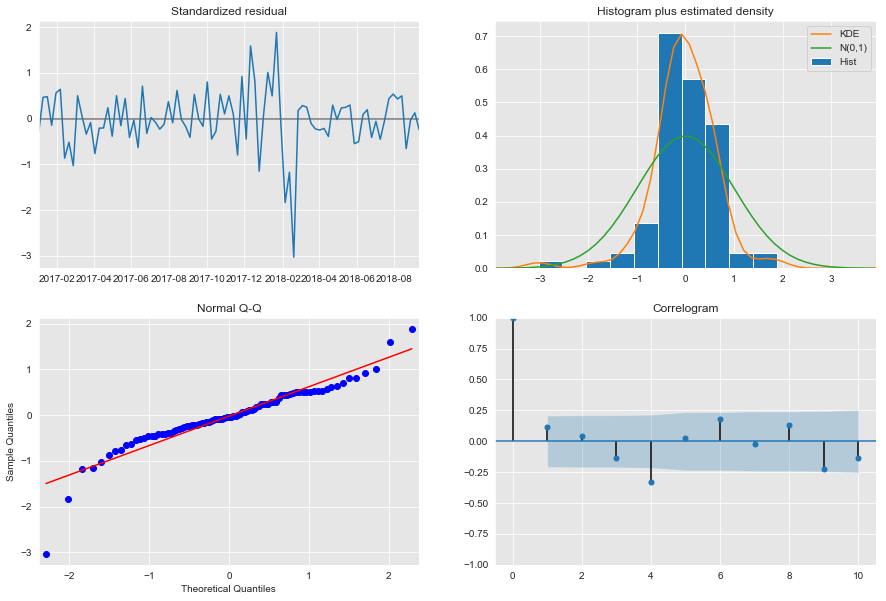

In [719]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

# Next Steps:
* Time-series analysis with CDC, Twitter, and Google Trends data to assess which model is best at forecasting outbreaks, using CDC data as 'ground truth' and AIC as a metric
* Add more annotated tweets
* Dashboard visualizations

In [478]:
x_train.shape

(3252, 22713)

In [356]:
x_test.shape

(1085, 22713)

In [357]:
y_train.shape

(3252,)

In [358]:
y_test.shape

(1085,)

In [359]:
np.savez("x_train", x_train)
np.savez("y_train", y_train)
np.savez("x_test", x_test)
np.savez("y_test", y_test)

In [361]:
x_train

<3252x22713 sparse matrix of type '<class 'numpy.float64'>'
	with 57038 stored elements in Compressed Sparse Row format>

In [363]:
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [364]:
test_data.shape

(1085,)

In [365]:
test_data

81      getting in early to wish you happy birthday fo...
2347    just found out that certain schools are gettin...
4064    the boy keeps coughing maybe its swine flu thi...
1854    they did have this worry where the infectious ...
544     watching all of the first and second season as...
3383    someone at my office has swine flu and now kee...
1214    getting ready to go home after week of dogding...
3364    what do get if you catch the bird flu tweetmen...
2632       getting swine flu vaccine top business concern
1688    had the afternoon off as fear may have come do...
2854    contact your doctor before getting flu shot if...
939     my throat has that horrible half sore feeling ...
910     rt if chuck grassley were in charge of we be g...
976     worried about catching the flu lots of hand sa...
2137    know the flu is getting closer and closer feel it
989     guess getting my flu shot on wednesday it is g...
3095    are there side effects from the flu shot afrai...
3380    someti

In [750]:
def forecasting(results, dynamic=False):
    # get predictions 
    pred = results.get_prediction(start=pd.to_datetime('2017-01-02'), dynamic=dynamic)
    pred_conf = pred.conf_int()
    # Plot real vs predicted values along with confidence interval
    rcParams['figure.figsize'] = 15, 6
    #Plot observed values
    ax = cdc_df['2016':].plot(label='observed')
    #Plot predicted values
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, color='#900C3F')
    #Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='#AC69C7', alpha=.5)
    #Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('ILI-visits')
    plt.legend()
    plt.show()
    plt.savefig('demo.png', transparent=True)
    # Get the Real and predicted values
    visits_forecasted = pred.predicted_mean
    visits_truth = cdc_df['2017-01-02':]['ILITOTAL']
    # Compute the mean square error
    mse = np.sqrt(((visits_forecasted - visits_truth) ** 2).mean())
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

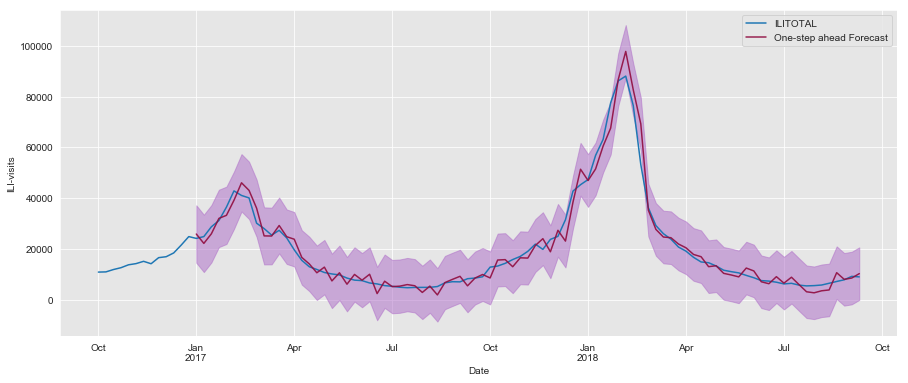

The Root Mean Squared Error of our forecasts is 3448.62


<Figure size 1080x432 with 0 Axes>

In [751]:
forecasting(results, dynamic=False)

In [754]:
get_forecast(2)

ValueError: Out-of-sample forecasting in a model with a regression component requires additional exogenous values via the `exog` argument.